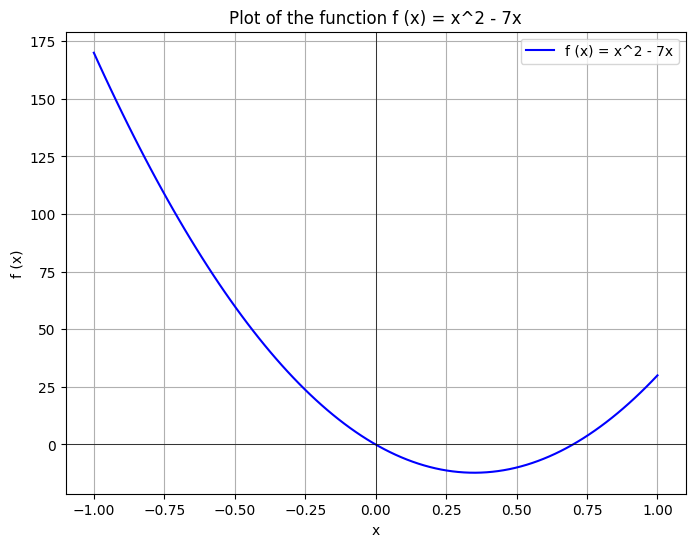

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

fx = x**2 - 7 * x
x1 = float(input('Start of x: '))
x2 = float(input('End of x: '))

x = np.linspace(x1, x2, 100)

def f(x):
    return fx

y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f (x) = x^2 - 7x', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of the function f (x) = x^2 - 7x')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.grid(True)
plt.legend()
plt.show()

In [116]:

def f_prime(x):
    return sp.diff(fx)

critical_points = np.roots([2, -7])

x_range = np.array([x1, x2])

y_values = f(np.concatenate((critical_points, x_range)))

y_min, y_max = y_values.min(), y_values.max()

print(f"Minimum value of the function in the range [{x1}, {x2}]: {y_min}")
print(f"Maximum value of the function in the range [{x1}, {x2}]: {y_max}")


Minimum value of the function in the range [-1.0, 1.0]: -12.248750127538004
Maximum value of the function in the range [-1.0, 1.0]: 170.0


In [113]:
x_range = np.linspace(x1, x2, 100)

y_prime_vals = f_prime(x_range)

if np.all(y_prime_vals < 0):
    print(f"The function is decreasing in the Input range [{x1}, {x2}]")
elif np.all(y_prime_vals > 0):
    print(f"The function is increasing in the Input range [{x1}, {x2}]")
else:
    critical_point = 1/15

    x_vals = np.array([x1, critical_point, x2])
    y_prime_vals = f_prime(x_vals)

    increasing_intervals = []
    decreasing_intervals = []

    if y_prime_vals[0] < 0:
        decreasing_intervals.append((x1, critical_point))
    else:
        increasing_intervals.append((x1, critical_point))

    if y_prime_vals[2] > 0:
        increasing_intervals.append((critical_point, x2))
    else:
        decreasing_intervals.append((critical_point, x2))

    print("Increasing intervals:", increasing_intervals)
    print("Decreasing intervals:", decreasing_intervals)


ValueError: 
Since there are no variables in the expression, the variable(s) of
differentiation must be supplied to differentiate [170.0,
164.586266707479, 159.254157739006, 154.003673094582,
148.834812774207, 143.74757677788, 138.741965105601, 133.817977757372,
128.97561473319, 124.214876033058, 119.535761656974, 114.938271604938,
110.422405876951, 105.988164473013, 101.635547393123,
97.3645546372819, 93.1751862054892, 89.0674420977451,
85.0413223140496, 81.0968268544026, 77.2339557188042,
73.4527089072544, 69.7530864197531, 66.1350882563004,
62.5987144168962, 59.1439649015407, 55.7708397102336,
52.4793388429752, 49.2694622997653, 46.141210080604, 43.0945821854913,
40.1295786144271, 37.2461993674115, 34.4444444444444, 31.724313845526,
29.0858075706561, 26.5289256198347, 24.0536679930619,
21.6600346903377, 19.3480257116621, 17.117641057035, 14.9688807264565,
12.9017447199265, 10.9162330374452, 9.01234567901234,
7.19008264462811, 5.44944393429242, 3.79042954800531,
2.21303948576676, 0.717273747576773, -0.696867666564632,
-2.02938475665748, -3.28027752270177, -4.44954596469748,
-5.53719008264462, -6.54320987654321, -7.46760534639323,
-8.31037649219468, -9.07152331394755, -9.75104581165187,
-10.3489439853076, -10.8652178349148, -11.2998673604734,
-11.6528925619835, -11.924293439445, -12.1140699928579,
-12.2222222222222, -12.248750127538, -12.1936537088052,
-12.0569329660239, -11.838587899194, -11.5386185083155,
-11.1570247933884, -10.6938067544128, -10.1489643913886,
-9.52249770431589, -8.81440669319458, -8.02469135802469,
-7.15335169880624, -6.20038771553924, -5.16579940822364,
-4.04958677685951, -2.85174982144679, -1.57228854198551,
-0.211202938475672, 1.23150698908276, 2.75584124068972,
4.36179981634526, 6.04938271604939, 7.81858993980205,
9.66942148760329, 11.6018773594531, 13.6159575553515,
15.7116620752985, 17.8889909192939, 20.147944087338, 22.4885215794307,
24.9107233955719, 27.4145495357617, 30.0]

In [89]:
import sympy as sp

# تعریف متغیر
x = sp.Symbol('x')

# تعریف تابع
f = x**2 + 3*x + 2

# محاسبه مشتق
f_prime = sp.diff(f, x)

print(f_prime)


2*x + 3


In [102]:
from sympy import symbols, expand

x = symbols('x')
expression = x**2 - 7*x
expanded_expression = expand(expression)
print(expanded_expression)

x**2 - 7*x
